In [9]:
%matplotlib inline
import numpy as np
import random
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import entropy as scent
from matplotlib import gridspec
import matplotlib.image as mpimg

import collections

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


def KL_sym_func(scores1, scores2):
    """Note, scores must be cats by samples"""
    KL_F = scent(scores1, scores2)
    KL_R = scent(scores2, scores1)
    measure = KL_F + KL_R
    return measure

   
bins = np.load('human_bincounts.npy')
humans = bins / np.sum(bins, axis = 1)[:, np.newaxis]
humans_smoothed = (bins +1) / np.sum(bins, axis = 1)[:, np.newaxis]

ordered_filenames = np.load('decoded_test_filename_order.npy')

labels = ['P', 'A', 'B', 'C', 'De', 'Do', 'F', 'H', 'S', 'T']

im_dir = '/home/battleday/Academic/Berkeley/Superman/local/images/test_images_named'

In [10]:
mod_files = os.listdir('.')
print(mod_files)
mod_files = sorted([m for m in mod_files if m[-4:] == '.npz'])
print(mod_files)

post_files = os.listdir('./post/')
print(post_files)
post_files = sorted([p for p in post_files if p[-4:] == '.npz'])
print(post_files)

['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', 'post', '.ipynb_checkpoints', 'resnext_29_8x64d.npz', 'wrn_28_10.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'entropy_fig-v1.ipynb', 'figs', 'decoded_test_filename_order.npy', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'human_bincounts.npy', 'example_images_fig.ipynb', 'pyramidnet_basic_110_270.npz', 'entropy_fig_v2.ipynb']
['densenet_BC_100_12.npz', 'pyramidnet_basic_110_270.npz', 'resnet_basic_110.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'vgg_15_BN_64.npz', 'wrn_28_10.npz']
['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'wrn_28_10.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'pyramidnet_basic_110_270.npz']
['densenet_BC_100_12.npz', 'pyramidnet_basic_110_270.npz', 'resnet_basic_110.npz', 'resnet_preact_bottleneck_164.npz', 'resnext_29_8x64d.npz', 'shake_shake_26_2x64d_

In [11]:
model_dict = collections.OrderedDict()
for m in mod_files:
    raw = np.load(m)
    raw_outs = raw['outputs']
    for raw_i in np.arange(raw_outs.shape[0]): 
        raw_outs[raw_i] = softmax(raw_outs[raw_i])
    model_dict[m.split('.')[0]] = raw_outs
print(model_dict.keys())

odict_keys(['densenet_BC_100_12', 'pyramidnet_basic_110_270', 'resnet_basic_110', 'resnet_preact_bottleneck_164', 'resnext_29_8x64d', 'shake_shake_26_2x64d_SSI_cutout16', 'vgg_15_BN_64', 'wrn_28_10'])


In [12]:
post_dict = collections.OrderedDict()

for p in post_files:
    raw = np.load('./post/' + p)
    raw_outs = raw['outputs']
    for raw_i in np.arange(raw_outs.shape[0]): 
        raw_outs[raw_i] = softmax(raw_outs[raw_i])
    post_dict[p.split('.')[0]] = raw_outs
    
print(post_dict.keys())

odict_keys(['densenet_BC_100_12', 'pyramidnet_basic_110_270', 'resnet_basic_110', 'resnet_preact_bottleneck_164', 'resnext_29_8x64d', 'shake_shake_26_2x64d_SSI_cutout16', 'vgg_15_BN_64', 'wrn_28_10'])


(10000,)
[ True  True  True] 9303 (10000,)
[6543 1823 1957 ..., 6792 8153 6750]


In [29]:

num_ims = 10
num_models = 1

#i = np.random.randint(10000)

sample = random.sample(range(0, 9999), num_ims)
print(sample)

added_rows = len(model_dict)
print('addded rows:', added_rows)
#model_dict = {'test': t_outs}

def fig_fn(title, save_path, ims, humans, model_dict,
           num_ims, added_rows, bolded_axes,
           base_rows = 3 + 1):
    """still a bunch of other things defined above
    that aren't in here.
    
    Model dict is ordered dict that includes humans"""
    
    fig = plt.figure(figsize=((num_ims) * 2, added_rows + base_rows)) 
    gs = gridspec.GridSpec(added_rows + base_rows, num_ims)
    
    fig.suptitle(title, fontsize = 20, fontweight='bold')
    
    for i in np.arange(num_ims):
        im = ims[i]
        ax_im_b = plt.subplot(gs[:3, i]) # size of im
        im_name_b = ordered_filenames[im]
        ax_im_b.xaxis.set_ticklabels([])
        ax_im_b.set_xticks([])
        ax_im_b.set_yticks([])
        #ax_im_b.set_title(labels[0], fontsize = 12)
        ax_im_b.yaxis.set_ticklabels([])
        img_b = mpimg.imread(im_dir + '/' + im_name_b)
        #ax_im_b.set_title('High certainty image', fontsize = 20)
        ax_im_b.imshow(img_b)


        im_guesses = humans[im]
        #print(im_guesses)
        ax_hist_b = plt.subplot(gs[3, i])
        ax_hist_b.bar(np.arange(10), im_guesses) #, align = 'left')
        ax_hist_b.set_xlim([-1, 10])
        ax_hist_b.set_ylim([0, 1]) 

        if ax_hist_b.is_first_col():
            if 0 in bolded_axes:
                ax_hist_b.set_ylabel('Human Pr', fontsize = 12, fontweight = 'bold')
            else:
                ax_hist_b.set_ylabel('Human Pr', fontsize = 12)
        
        else:
            ax_hist_b.yaxis.set_ticks([])

        ax_hist_b.xaxis.set_ticks([])

        for e, (key, value) in enumerate(model_dict.items()):
            im_guesses = value[im]
            #print(im_guesses)
            ax_hist_n = plt.subplot(gs[base_rows + (e), i])
            ax_hist_n.bar(np.arange(10), im_guesses) #, align = 'left')
            ax_hist_n.set_xlim([-1, 10])
            ax_hist_n.set_ylim([0, 1]) 

            if ax_hist_n.is_first_col():
                if (e + 1) in bolded_axes:
                    ax_hist_n.set_ylabel('{0}'.format(key)[:6], fontsize = 12, fontweight = 'bold') 
                else: 
                    ax_hist_n.set_ylabel('{0}'.format(key)[:6], fontsize = 12) 
                        # set to count
            else:
                ax_hist_n.yaxis.set_ticks([])
            ax_hist_n.xaxis.set_ticks([])

            if ax_hist_n.is_last_row():
                ax_hist_n.xaxis.set_ticks(np.arange(num_ims))
                ax_hist_n.xaxis.set_ticklabels(labels)
        
        plt.xticks(rotation = -45, ha='center')

    plt.savefig(save_path + '/' + title + '.png')



[8089, 2833, 2071, 7723, 2761, 3170, 7656, 4290, 9536, 8470]
addded rows: 8


(10000,)
[ True  True  True] 9303 (10000,)
[6543 1823 1957 ..., 6792 8153 6750]


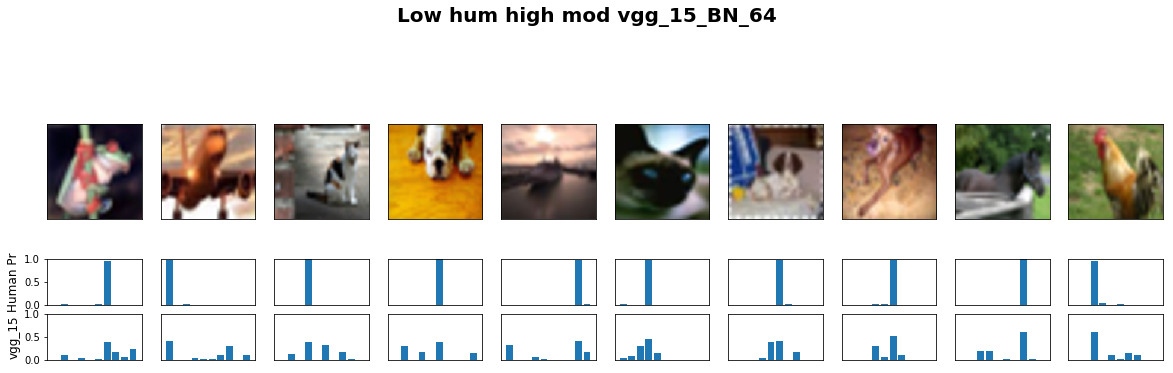

In [31]:
k = 'vgg_15_BN_64'
mod = {k: model_dict[k]}
mod_scores = mod[k]
mod_ent = scent(mod_scores.T)
print(mod_ent.shape)

human_ent = scent(humans_smoothed.T)

match = (np.argmax(humans, axis=1) == np.argmax(mod_scores, axis = 1))
print(match[:3], np.where(match)[0].shape[0], match.shape)

low_hum_high_mod = np.argsort(human_ent - (mod_ent * match)) # this removes non-matches
#print(low_hum_high_mod)


fig_fn('Low hum high mod {0}'.format(k), 'figs', low_hum_high_mod, humans, mod, num_ims, added_rows, [])

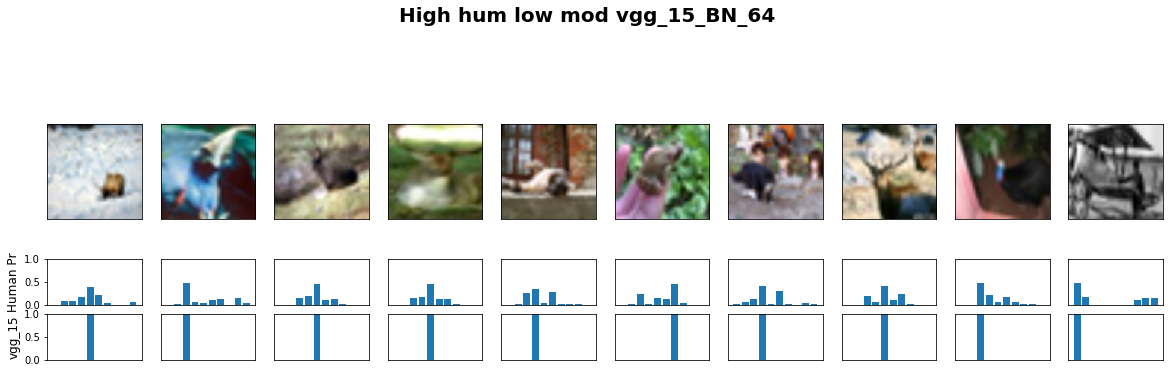

In [32]:

high_hum_low_mod = np.argsort(mod_ent - (human_ent * match)) # this removes non-matches
#print(high_hum_low_mod)

fig_fn('High hum low mod {0}'.format(k), 'figs', high_hum_low_mod, humans, mod, num_ims, added_rows, [])

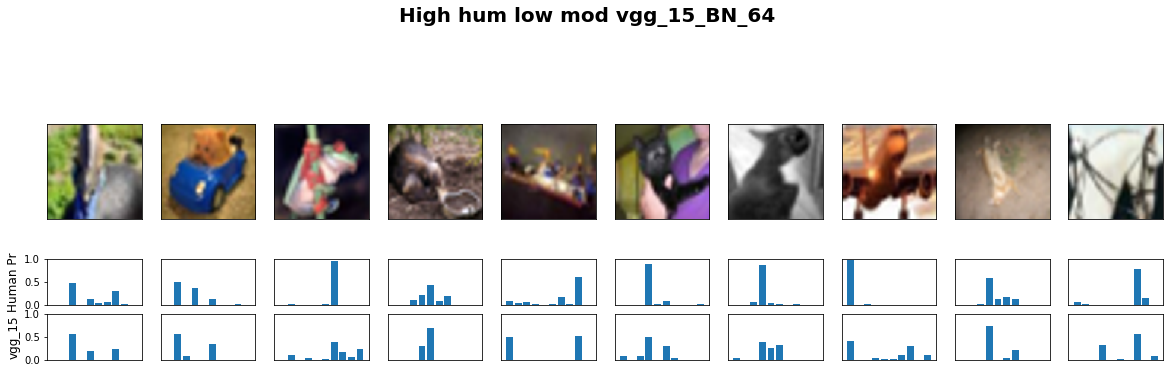

In [34]:

high_hum_high_mod = np.argsort((mod_ent*match) + (human_ent * match))[::-1] # this removes non-matches
#print(high_hum_low_mod)

fig_fn('High hum low mod {0}'.format(k), 'figs', high_hum_high_mod, humans, mod, num_ims, added_rows, [])